In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from netCDF4 import Dataset

from datetime import datetime
from datetime import timedelta

from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.signal import argrelextrema


In [2]:
data = Dataset('air.mon.mean.nc','r')

In [3]:
data.variables

OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  units: degrees_north
                  actual_range: [ 90. -90.]
                  long_name: Latitude
                  standard_name: latitude
                  axis: Y
              unlimited dimensions: 
              current shape = (73,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
                  units: degrees_east
                  long_name: Longitude
                  actual_range: [  0.  357.5]
                  standard_name: longitude
                  axis: X
              unlimited dimensions: 
              current shape = (144,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  long_name: Time
                 

In [4]:
lat = np.array(data['lat'])
lon = np.array(data['lon'])
time = np.array(data['time'])
air = np.array(data['air'])

In [5]:
print(lat.shape, lon.shape,time.shape,air.shape)

(73,) (144,) (861,) (861, 73, 144)


In [6]:
Fechas = np.array([datetime(1800,1,1,0,0)+timedelta(hours = time[i]) for i in range(len(time))])

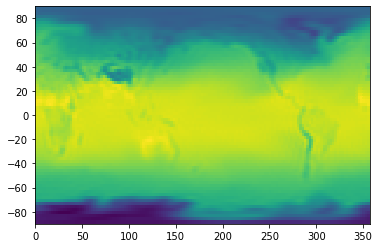

In [7]:
plt.figure()
plt.pcolor(lon,lat,air[2])

# Región de interés

In [8]:
latS = -30
latN = 30
lonW = 72.5
lonE = 320

lat_int = np.where((lat >= latS) & (lat <= latN))[0]
lon_int = np.where((lon >= lonW) & (lon <= lonE))[0]
print(lat_int)
print()
print(lon_int)

[24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]

[ 29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128]


In [9]:
air_region = air[:,lat_int[0]:(lat_int[-1]+1),lon_int[0]:(lon_int[-1]+1)]
lat1 = lat[lat_int]
lon1 = lon[lon_int]

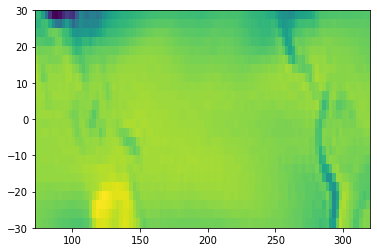

In [10]:
plt.figure()
plt.pcolor(lon1,lat1,air_region[0])

# Filtrado

/home/mario/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/mario/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/home/mario/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


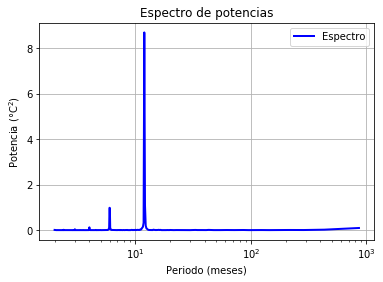

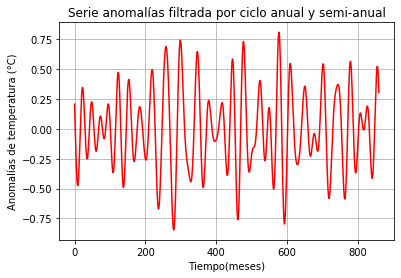

In [11]:
air_filt = np.zeros_like(air_region) #Banda de interés del espectro(Tarea1)

for i in range(len(lat1)):
    for j in range(len(lon1)):
        serie = air_region[:,i,j]-np.mean(air_region[:,i,j])
        ft_serie = np.fft.fft(serie)
        pot_serie = np.abs(1./len(serie)*ft_serie)**2
        freq_serie = np.fft.fftfreq(len(serie),1)
        periodo_serie = 1./freq_serie
        freqpos_serie = np.where(freq_serie > 0)[0]
        
        if (i==2) and (j==3):
            plt.figure()
            plt.plot(periodo_serie[freqpos_serie],pot_serie[freqpos_serie], color='b', label = 'Espectro',lw=2)
            plt.title('Espectro de potencias')
            plt.xlabel('Periodo (meses)')
            plt.ylabel(r'Potencia (°C$^2$)')
            plt.grid(True)
            plt.xscale('log')
            plt.legend(loc = 'upper right')
#             plt.savefig('EspectroPotencia.pdf',dpi=300,bbox_inches="tight")
            
            
        fft_serie = np.copy(ft_serie)
        fft_serie[np.where(((np.abs(1./freq_serie) < 25) | (np.abs(1./freq_serie) > 60)))[0]] = 0
        air_filt[:,i,j] = np.fft.ifft(fft_serie)
        
        if (i==2) and (j==3):
            plt.figure()
            plt.plot( air_filt[:,i,j], c = 'r')
            plt.title('Serie anomalías filtrada por ciclo anual y semi-anual')
            plt.xlabel('Tiempo(meses)')
            plt.ylabel('Anomalías de temperatura (°C)')
            plt.grid(True)
#             plt.savefig('SerieAnomaliasSinAnual.pdf',dpi=300,bbox_inches="tight")

/home/mario/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


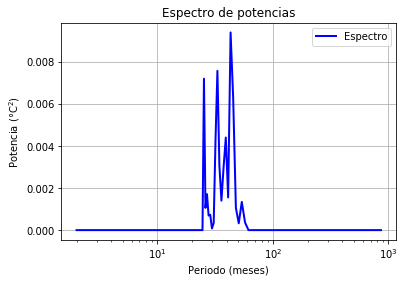

In [12]:
air_filt_2 = np.zeros_like(air_filt)

for i in range(len(lat1)):
    for j in range(len(lon1)):
        serie = air_filt[:,i,j]-np.mean(air_filt[:,i,j])
        ft_serie = np.fft.fft(serie)
        pot_serie = np.abs(1./len(serie)*ft_serie)**2
        freq_serie = np.fft.fftfreq(len(serie),1)
        periodo_serie = 1./freq_serie
        freqpos_serie = np.where(freq_serie > 0)[0]
        
        if (i==2) and (j==3):
            plt.figure()
            plt.plot(periodo_serie[freqpos_serie],pot_serie[freqpos_serie], color='b', label = 'Espectro',lw=2)
            plt.title('Espectro de potencias')
            plt.xlabel('Periodo (meses)')
            plt.ylabel(r'Potencia (°C$^2$)')
            plt.grid(True)
            plt.xscale('log')
            plt.legend(loc = 'upper right')
#             plt.savefig('EspectroPotencia.pdf',dpi=300,bbox_inches="tight")




In [13]:
air_filt.shape

(861, 25, 100)

In [14]:
air_filt_r = np.reshape(air_filt,[air_filt.shape[0],air_filt.shape[1]*air_filt.shape[2]])

In [15]:
air_filt_r.shape

(861, 2500)

# SVD

In [16]:
%%time
U_air,S_air,Vh_air = np.linalg.svd(air_filt_r, full_matrices=True)

CPU times: user 12.1 s, sys: 2.72 s, total: 14.8 s
Wall time: 1.97 s


In [17]:
print(U_air.shape, S_air.shape,Vh_air.shape)

(861, 861) (861,) (2500, 2500)


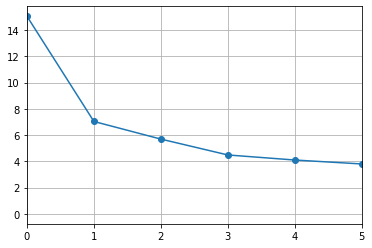

In [18]:
plt.figure()
plt.plot(((S_air/np.sum(S_air))*100), marker = 'o')
plt.xlim(0,5)
plt.grid()

El número de modos importantes es 3 para este caso

In [19]:
nmod = 3

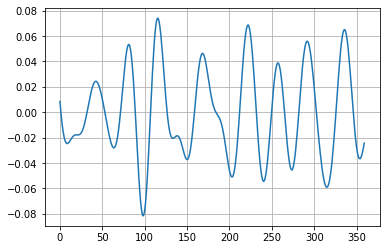

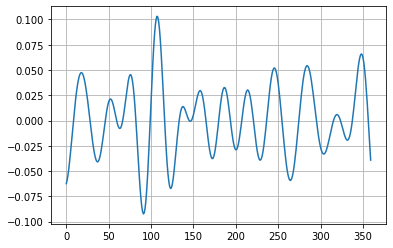

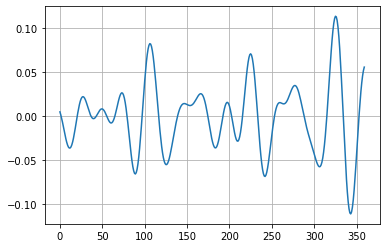

In [20]:
for i in range(nmod):
    plt.figure()
    plt.plot(U_air[-360:,i])
    plt.grid()

In [21]:
# EOF1_air = Vh_air[0,:].reshape(lat1.shape[0],lon1.shape[0])
# EOF2_air = Vh_air[1,:].reshape(lat1.shape[0],lon1.shape[0])
# EOF3_air = Vh_air[2,:].reshape(lat1.shape[0],lon1.shape[0])
EOFs = np.zeros([nmod,lat1.shape[0],lon1.shape[0]])

for i in range(nmod):
    EOFs[i,:,:] = Vh_air[i,:].reshape(lat1.shape[0],lon1.shape[0])



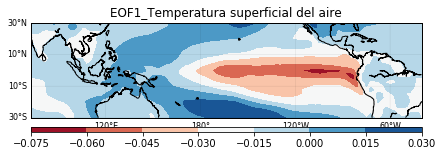

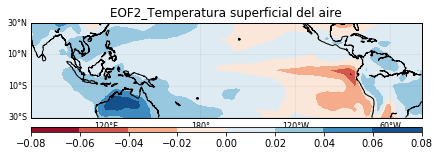

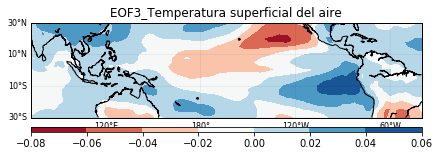

In [22]:
for i in range(nmod):
    nombre = 'EOF'+str(i+1)+'_Temperatura superficial del aire'
    fig = plt.figure(figsize=(7,5))
    ax  = fig.add_subplot(111)
    m   = Basemap(llcrnrlat=latS,urcrnrlat=latN,llcrnrlon=lonW,urcrnrlon=lonE,\
                 rsphere=6371200.,resolution='l',area_thresh=10000)
    x,y = m(*np.meshgrid(lon1,lat1))
    niveles=np.arange(-0.1,0.1,0.05)
    cs=m.contourf(x,y,EOFs[i], cmap='RdBu')
    m.colorbar(cs,location='bottom',pad="10%")
    m.drawparallels(np.arange(-30.,91,20.),labels=[1,0,0,0],size=8,linewidth=0.1)
    m.drawmeridians(np.arange(0,361,60.),labels=[0,1,0,1],size=8,linewidth=0.1)
    m.drawcoastlines()
    m.drawmapboundary()
    plt.title(nombre, size = 12)
    plt.savefig('MapVarianzaBanda.pdf',dpi=300,bbox_inches="tight")
    

# EOF extendida

(0, 50)

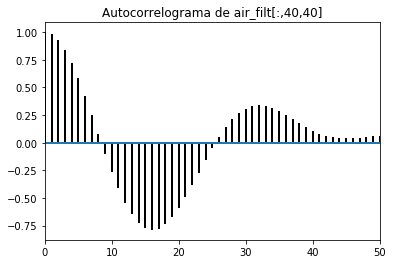

In [23]:
plt.figure()
plt.xcorr(air_filt[:,0,0],air_filt[:,0,0],maxlags = 150, normed =True, lw =2)
plt.title('Autocorrelograma de air_filt[:,40,40]')
plt.xlim(0,50)

(0, 50)

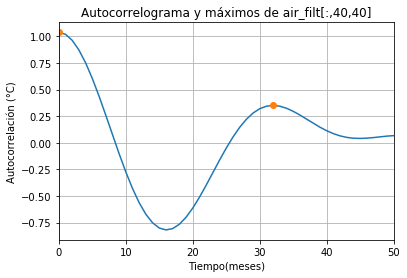

In [24]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return (result[result.size // 2:])/100.

a = autocorr(air_filt[:,0,0])
x = np.arange(0,len(time),1)
cero = [0]
cero1 = np.array(cero)
max_autocorr = argrelextrema(a, np.greater)[0]
m =  np.concatenate([cero1,max_autocorr], axis = 0)

plt.plot(x,a)
plt.plot(x[m],a[m],'o')
plt.title('Autocorrelograma y máximos de air_filt[:,40,40]')
plt.xlabel('Tiempo(meses)')
plt.ylabel('Autocorrelación (°C)')
plt.grid(True)
plt.xlim(0,50)

Se decide hacer 6 rezagos de 5 meses cada uno

In [25]:
nrez = 6
rez = 5

In [26]:
air_filt_rez = np.zeros([air_filt_r.shape[0]-nrez*rez,air_filt_r.shape[1]*nrez])*np.NaN

for i in range(nrez):
    air_filt_rez[:,i*air_filt_r.shape[1]:air_filt_r.shape[1]*(i+1)] = \
    air_filt_r[i*rez:i*rez+(air_filt_r.shape[0]-rez*nrez),:]

# SVD extendido

In [27]:
%%time
U_air_e,S_air_e,Vh_air_e = np.linalg.svd(air_filt_rez, full_matrices=True)

CPU times: user 9min 57s, sys: 20.6 s, total: 10min 18s
Wall time: 1min 21s


In [28]:
print(U_air_e.shape, S_air_e.shape,Vh_air_e.shape)

(831, 831) (831,) (15000, 15000)


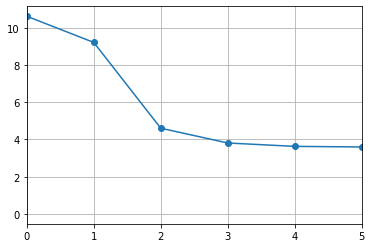

In [29]:
plt.figure()
plt.plot(((S_air_e/np.sum(S_air_e))*100), marker = 'o')
plt.xlim(0,5)
plt.grid()

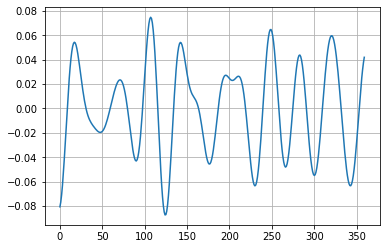

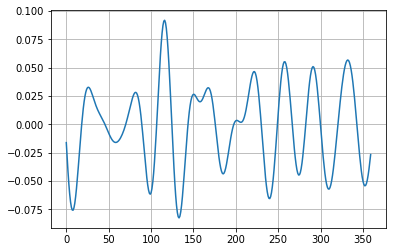

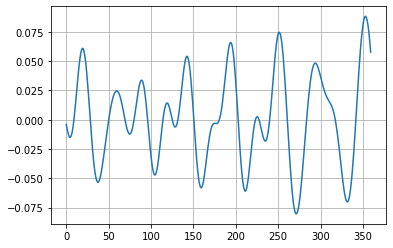

In [30]:
for i in range(3):
    plt.figure()
    plt.plot(U_air_e[-360:,i])
    plt.grid()

In [31]:
# EOF1_air_e = Vh_air_e[0,:].reshape(nrez,lat1.shape[0],lon1.shape[0])
# EOF2_air_e = Vh_air_e[1,:].reshape(nrez,lat1.shape[0],lon1.shape[0])
# EOF3_air_e = Vh_air_e[2,:].reshape(nrez,lat1.shape[0],lon1.shape[0])
EOFs_e = np.zeros([nmod,nrez,lat1.shape[0],lon1.shape[0]])

for i in range(nmod):
    EOFs_e[i,:,:,:] = Vh_air_e[i,:].reshape(nrez,lat1.shape[0],lon1.shape[0])

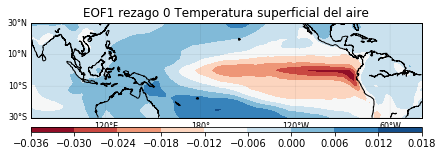

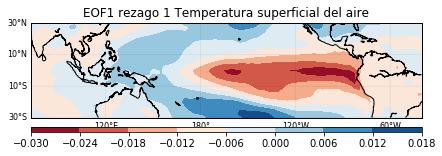

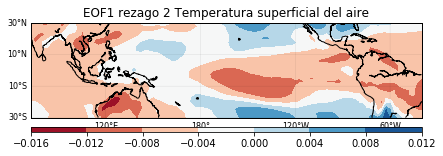

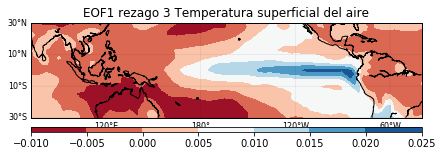

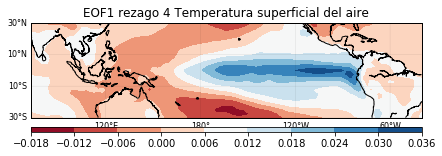

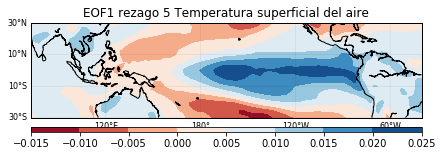

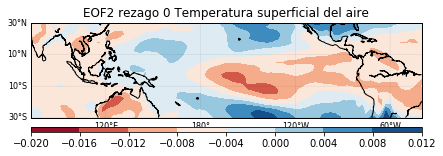

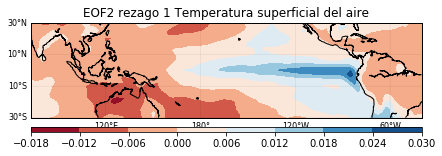

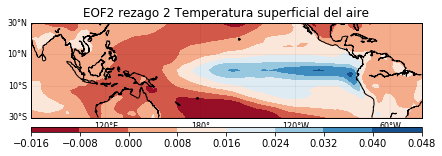

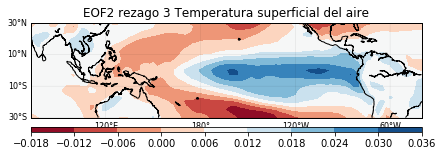

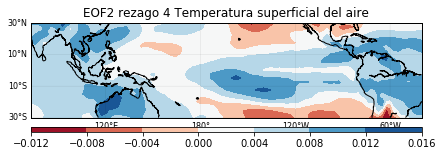

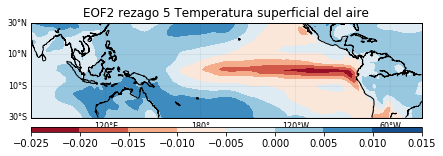

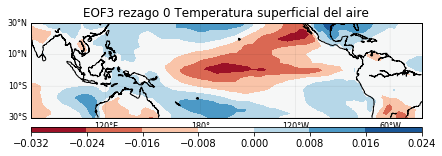

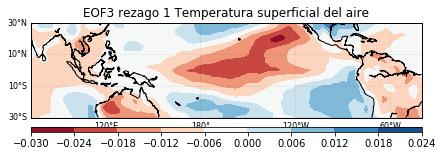

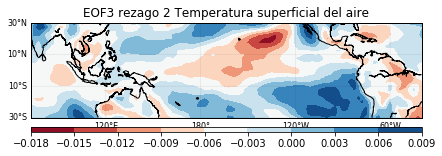

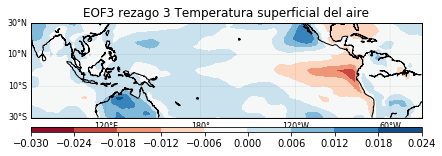

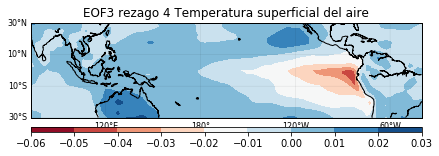

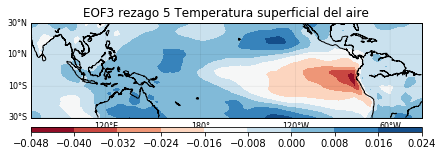

In [32]:
for i in range(nmod):
    for j in range(nrez):
        nombre = 'EOF'+str(i+1)+' rezago '+str(j)+' Temperatura superficial del aire'
        fig = plt.figure(figsize=(7,5))
        ax  = fig.add_subplot(111)
        m   = Basemap(llcrnrlat=latS,urcrnrlat=latN,llcrnrlon=lonW,urcrnrlon=lonE,\
                     rsphere=6371200.,resolution='l',area_thresh=10000)
        x,y = m(*np.meshgrid(lon1,lat1))
#         niveles=np.arange(-0.05,0.05,0.01)
        cs=m.contourf(x,y,EOFs_e[i,j], cmap='RdBu')
        m.colorbar(cs,location='bottom',pad="10%")
        m.drawparallels(np.arange(-30.,91,20.),labels=[1,0,0,0],size=8,linewidth=0.1)
        m.drawmeridians(np.arange(0,361,60.),labels=[0,1,0,1],size=8,linewidth=0.1)
        m.drawcoastlines()
        m.drawmapboundary()
        plt.title(nombre, size = 12)
#         plt.savefig('MapVarianzaBanda.pdf',dpi=300,bbox_inches="tight")
